In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import hstack,vstack
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
import re
import os

In [2]:
def splitdate(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
# os.listdir()
full_train_data = pd.read_csv(f'data/COL774_drug_review/DrugsComTrain.csv',parse_dates=['date'],na_filter=False)
full_val_data = pd.read_csv("data/COL774_drug_review/DrugsComVal.csv",parse_dates=['date'],na_filter=False)
full_test_data = pd.read_csv("data/COL774_drug_review/DrugsComTest.csv",parse_dates=['date'],na_filter=False)

splitdate(full_train_data)
splitdate(full_val_data)
splitdate(full_test_data)


In [3]:
def cleandata(x_train):
    for i in range(len(x_train)):
        s = x_train[i,1]
        s = s.lower()
        s = re.sub(r'[\r\n"]', '', s)
        s = s = re.sub(r"[,.]", ' ', s)
        s = s = re.sub(r"&#039;", "'", s)
        x_train[i,1] = s

In [4]:
x_train = full_train_data[["condition","review"]].copy().to_numpy()
x_val = full_val_data[["condition","review"]].copy().to_numpy()
x_test = full_test_data[["condition","review"]].copy().to_numpy()
cleandata(x_train)
cleandata(x_val)
cleandata(x_test)

In [5]:
y_train = full_train_data[["rating"]].copy().to_numpy()
y_val = full_val_data[["rating"]].copy().to_numpy()
y_test = full_test_data[["rating"]].copy().to_numpy()

In [6]:
condition_encoder = CountVectorizer(stop_words=stop_words)
reviews_encoder = CountVectorizer(stop_words=stop_words)
train_reviews = reviews_encoder.fit_transform(x_train[:,1])
train_conditions = condition_encoder.fit_transform(x_train[:,0])

In [7]:
val_reviews = reviews_encoder.transform(x_val[:,1])
test_reviews = reviews_encoder.transform(x_test[:,1])
val_conditions = condition_encoder.transform(x_val[:,0])
test_conditions = condition_encoder.transform(x_test[:,0])

In [8]:
training_data = hstack((train_reviews,train_conditions,full_train_data[['year', 'month', 'day','usefulCount']].values))
val_data = hstack((val_reviews,val_conditions,full_val_data[['year', 'month', 'day','usefulCount']].values))
test_data = hstack((test_reviews,test_conditions,full_test_data[['year', 'month', 'day','usefulCount']].values))

In [ ]:
import time
start = time.time()
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(training_data, y_train)
end = time.time()
print(end-start)

In [20]:
print(clf.score(training_data,y_train))
print(clf.score(val_data,y_val))
print(clf.score(test_data,y_test))

1.0
0.5797185310711112
0.5755682029535394


In [12]:
print(clf.tree_.max_depth)

201


In [28]:
from sklearn.model_selection import PredefinedSplit,GridSearchCV

x_train_val_data = vstack((training_data,val_data))
y_train_val_data = np.concatenate((y_train,y_val))

# split_index = [-1 if x < training_data.shape[0] else 0 for x in range(x_train_val_data.shape[0])]
# print(x_train_data.shape)

In [9]:
def traindtree(params):
    clf = tree.DecisionTreeClassifier(max_depth = params[0],min_samples_split = params[1],min_samples_leaf = params[2])
    clf.fit(training_data, y_train)
    return clf

In [18]:
chunker(combinations,12)

[[(100, 2, 1),
  (100, 2, 3),
  (100, 2, 5),
  (100, 2, 7),
  (100, 2, 9),
  (100, 4, 1),
  (100, 4, 3),
  (100, 4, 5),
  (100, 4, 7),
  (100, 4, 9),
  (100, 6, 1),
  (100, 6, 3)],
 [(100, 6, 5),
  (100, 6, 7),
  (100, 6, 9),
  (100, 8, 1),
  (100, 8, 3),
  (100, 8, 5),
  (100, 8, 7),
  (100, 8, 9),
  (120, 2, 1),
  (120, 2, 3),
  (120, 2, 5),
  (120, 2, 7)],
 [(120, 2, 9),
  (120, 4, 1),
  (120, 4, 3),
  (120, 4, 5),
  (120, 4, 7),
  (120, 4, 9),
  (120, 6, 1),
  (120, 6, 3),
  (120, 6, 5),
  (120, 6, 7),
  (120, 6, 9),
  (120, 8, 1)],
 [(120, 8, 3),
  (120, 8, 5),
  (120, 8, 7),
  (120, 8, 9),
  (140, 2, 1),
  (140, 2, 3),
  (140, 2, 5),
  (140, 2, 7),
  (140, 2, 9),
  (140, 4, 1),
  (140, 4, 3),
  (140, 4, 5)],
 [(140, 4, 7),
  (140, 4, 9),
  (140, 6, 1),
  (140, 6, 3),
  (140, 6, 5),
  (140, 6, 7),
  (140, 6, 9),
  (140, 8, 1),
  (140, 8, 3),
  (140, 8, 5),
  (140, 8, 7),
  (140, 8, 9)],
 [(160, 2, 1),
  (160, 2, 3),
  (160, 2, 5),
  (160, 2, 7),
  (160, 2, 9),
  (160, 4, 1),
  (16

In [10]:
# pds = PredefinedSplit(test_fold = split_index)

param_grid =  {'max_depth': [i for i in range(150,201,10)], 'min_samples_split' : [i for i in range(2,20,4)], 'min_samples_leaf' : [i for i in range(1,10,1)]}  
 

# clf = GridSearchCV(estimator = tree.DecisionTreeClassifier(random_state=0),cv=pds,param_grid=param_grid)
import itertools
a = param_grid.values()
combinations = list(itertools.product(*a))
print(len(combinations))

270


In [ ]:
def chunker(seq, size):
    return [seq[pos:pos + size] for pos in range(0, len(seq), size)]
from multiprocessing import Pool
import tqdm
import os
import pickle
gridclfs = []
with Pool() as p:
    for param in tqdm.tqdm(chunker(combinations,12)):
        gridclfs.append(p.map(traindtree,param))

 22%|████████▉                                | 5/23 [44:33<3:04:42, 615.69s/it]

In [27]:
clf_flat = [item for sublist in gridclfs for item in sublist]
gridclfs = clf_flat
pickle.dump(gridclfs, open(f"gridrdtree_pickle", 'wb'))

In [28]:
train_scores = [clf.score(training_data, y_train) for clf in gridclfs]
val_scores = [clf.score(val_data,y_val) for clf in gridclfs]
test_scores = [clf.score(test_data,y_test) for clf in gridclfs]

In [32]:
test_scores[np.argsort(val_scores)[-1]]

0.5758657887884536

In [30]:
len(split_index)

161297

### Part b - GridSearch

In [ ]:
clf = clf.fit(x_train_val_data, y_train_val_data)

In [ ]:
print(clf.best_estimator_)

In [ ]:
print(clf.best_estimator_.score(training_data,y_train))
print(clf.best_estimator_.score(val_data,y_val))
print(clf.best_estimator_.score(test_data,y_test))

### Part c - CCP

In [11]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(training_data, y_train)
path = clf.cost_complexity_pruning_path(training_data, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

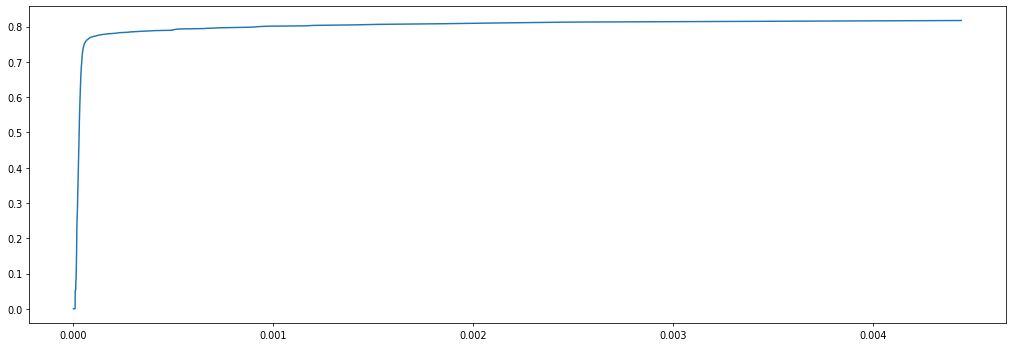

In [12]:
plt.rcParams['figure.dpi'] = 70
plt.rcParams['figure.figsize']=[18,6]    
plt.plot(ccp_alphas[:-1],impurities[:-1])

In [12]:
ccp_samples = [ccp_alphas[i] for i in range(0,len(ccp_alphas),50)]
ccp_alphas = ccp_samples


In [13]:
print(len(ccp_alphas))

479


In [19]:
print(os.cpu_count())

12


In [ ]:
from multiprocessing import Pool
import tqdm
import pickle
def chunker(seq, size):
    return [seq[pos:pos + size] for pos in range(0, len(seq), size)]
def trainmodel(ccp_alpha):
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(training_data, y_train)
    return clf
        
clfs = []
with Pool() as p:
    for ccp_alpha in tqdm.tqdm(chunker(ccp_alphas,12)):
#         start = time.time()
        clfs.append(p.map(trainmodel,ccp_alpha))
        pickle.dump(clfs[-1], open(f"model{j}_clf_pickle", 'wb'))
#         end = time.time()
#         print(end-start)

In [9]:
import pickle
clfs = pickle.load(open("allmodel_clf_pickle", 'rb'))
print(len(clfs))

479


In [25]:
clf_flat = [item for sublist in clfs for item in sublist]
clfs = clf_flat

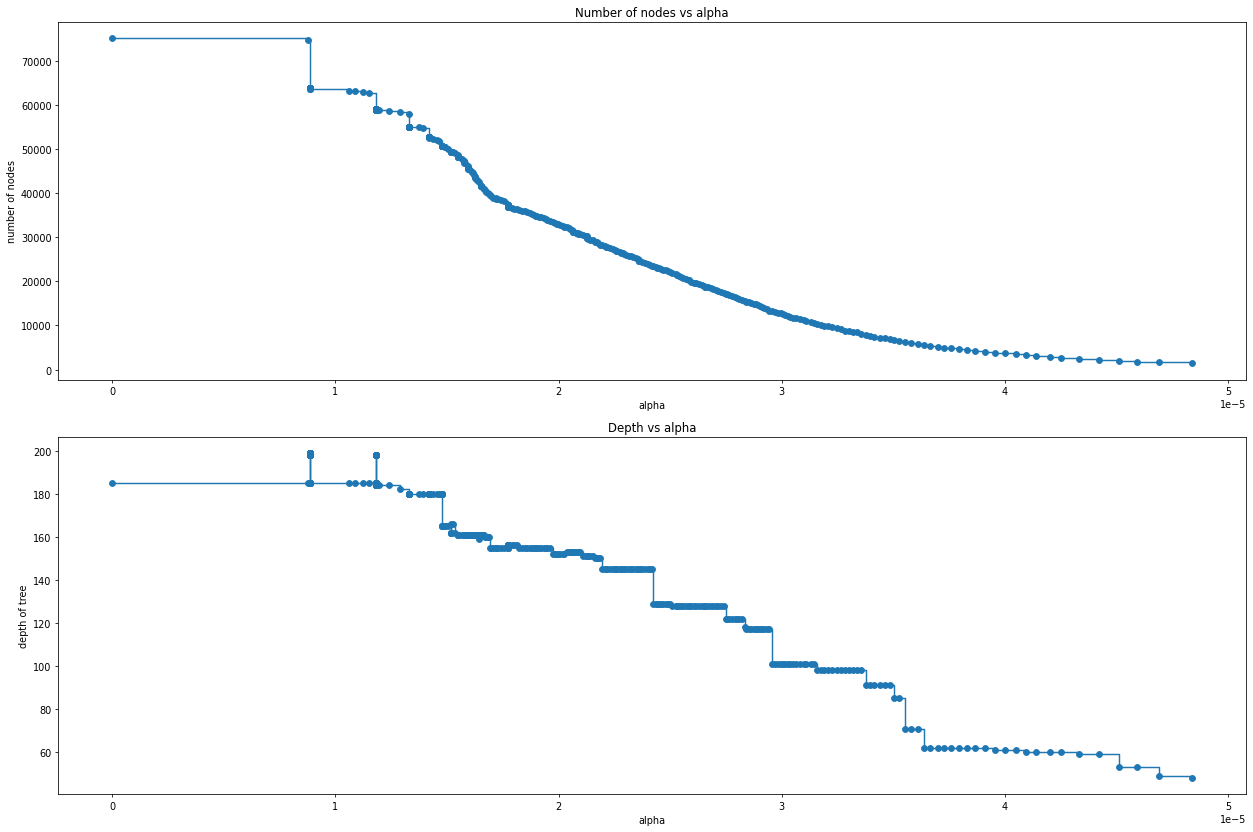

In [23]:
plt.rcParams['figure.dpi'] = 70
plt.rcParams['figure.figsize']=[18,12]
# clfs = clfs[:-1]
# ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas[:-10], node_counts[:-10], marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas[:-10], depth[:-10], marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

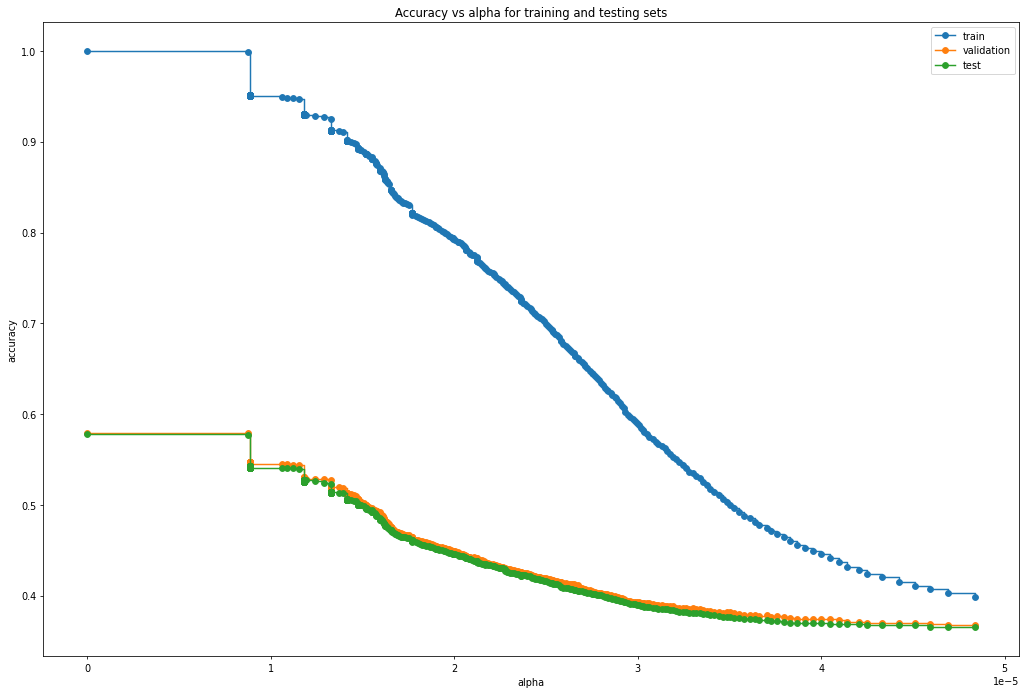

In [21]:
train_scores = [clf.score(training_data, y_train) for clf in clfs]
val_scores = [clf.score(val_data,y_val) for clf in clfs]
test_scores = [clf.score(test_data,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-10], train_scores[:-10], marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-10], val_scores[:-10], marker="o", label="validation", drawstyle="steps-post")
ax.plot(ccp_alphas[:-10], test_scores[:-10], marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [24]:
print(test_scores[np.argsort(val_scores)[-1]])

0.5778186958300785


In [9]:
# from sklearn.model_selection import PredefinedSplit,GridSearchCV

# x_train_val_data = vstack((training_data,val_data))
# y_train_val_data = np.concatenate((y_train,y_val))

# split_index = [-1 if x < training_data.shape[0] else 0 for x in range(x_train_val_data.shape[0])]
# # print(x_train_data.shape)

# pds = PredefinedSplit(test_fold = split_index)

param_grid =   {'n_estimators': range(50,451,50), 'max_features' : [0.4,0.5,0.6,0.7,0.8], 'min_samples_split' : [i for i in [2,4,6,8,10]]}  
 

# clf = GridSearchCV(estimator = RandomForestClassifier(oob_score = True),cv=pds,param_grid=param_grid)
# clf.fit(x_train_val_data, y_train_val_data.reshape((-1,)))

In [14]:
import itertools
a = param_grid.values()
combinations = list(itertools.product(*a))
print(len(combinations))

120


In [24]:
def chunker(seq, size):
    return [seq[pos:pos + size] for pos in range(0, len(seq), size)]
def trainrf(params):
    clf = RandomForestClassifier(n_estimators = params[0],max_features = params[1],min_samples_split = params[2],oob_score = True)
    clf.fit(training_data, y_train.reshape(-1,))
    return clf

In [12]:
import time
start  = time.time()
clf = RandomForestClassifier(oob_score = True)
clf.fit(training_data, y_train.reshape(-1,))
end = time.time()

In [13]:
end-start

403.7724857330322

In [ ]:
from multiprocessing import Pool
import tqdm
import pickle
gridclfs = []
with Pool() as p:
    for param in tqdm.tqdm(chunker(combinations,6)):
        gridclfs.append(p.map(trainrf,param))


  0%|                                                    | 0/38 [00:00<?, ?it/s]

In [ ]:
clf_flat = [item for sublist in gridclfs for item in sublist]
gridclfs = clf_flat
pickle.dump(gridclfs, open(f"gridrfs_pickle", 'wb'))

### XGBOOST

In [9]:
param_grid = {'n_estimators': range(50,451,50), 'max_depth' : [40,50,60,70], 'subsample' : [0.4,0.5,0.6,0.7,0.8]}  
import itertools
a = param_grid.values()
combinations = list(itertools.product(*a))
print(len(combinations))


180


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
xgb_y_train = le.fit_transform(y_train.reshape(-1,))
xgb_y_val = le.fit_transform(y_val.reshape(-1,))
xgb_y_test = le.fit_transform(y_test.reshape(-1,))

In [11]:
import xgboost as xgb
def trainxgb(params):
    clf = xgb.XGBClassifier(n_estimators = params[0],max_depth = params[1],subsample = params[2])
    clf.fit(training_data, xgb_y_train)
    return clf

In [28]:
import time
start  = time.time()
clf = xgb.XGBClassifier(tree_method = 'gpu_hist')
clf.fit(training_data, xgb_y_train)
end = time.time()
print(end-start)

[20:30:38] WARNING: ../src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


XGBoostError: [20:30:38] ../src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /home/atifanwer/anaconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x1e4459) [0x7f55205e4459]
  [bt] (1) /home/atifanwer/anaconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x1e5571) [0x7f55205e5571]
  [bt] (2) /home/atifanwer/anaconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x1e595a) [0x7f55205e595a]
  [bt] (3) /home/atifanwer/anaconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x225a3d) [0x7f5520625a3d]
  [bt] (4) /home/atifanwer/anaconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x68) [0x7f55204bf098]
  [bt] (5) /home/atifanwer/anaconda3/lib/python3.9/lib-dynload/../../libffi.so.7(+0x69dd) [0x7f5578b9a9dd]
  [bt] (6) /home/atifanwer/anaconda3/lib/python3.9/lib-dynload/../../libffi.so.7(+0x6067) [0x7f5578b9a067]
  [bt] (7) /home/atifanwer/anaconda3/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x140f6) [0x7f5578bb40f6]
  [bt] (8) /home/atifanwer/anaconda3/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x1073e) [0x7f5578bb073e]



In [20]:
clf.score(test_data,xgb_y_test)

0.630602983297995

In [12]:
from multiprocessing import Pool
import tqdm
import pickle
gridclfs = []
for param in tqdm.tqdm(combinations):
    gridclfs.append(trainxgb(param))

  2%|▊                                      | 4/180 [27:25<20:06:47, 411.40s/it]


KeyboardInterrupt: 

In [14]:
# clf_flat = [item for sublist in gridclfs for item in sublist]
# gridclfs = clf_flat
pickle.dump(gridclfs, open(f"gridxgb_pickle", 'wb'))